In [1]:
import scanpy as sc
import scFates as scf
sc.set_figure_params(dpi_save=300)
scf.set_figure_pubready()
adata_all=sc.read("data/adata_tree.h5ad")

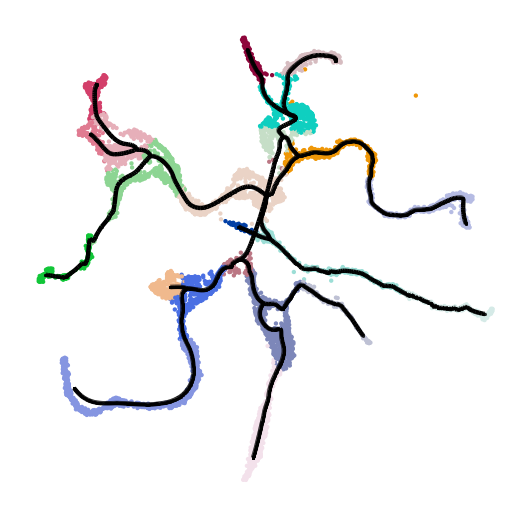

In [2]:
scf.pl.graph(adata_all,color_cells="milestones",title="",size_nodes=.1,tips=False,forks=False,legend_loc="none",save="_fig6a.pdf",frameon=False)

In [3]:
dct={'SatGlia':"#fed700",
     'late_NCC2':"#ae6e62",
     'Sensory 1':"#d6e273",
     'GutNeuron':"#3f9d69"}

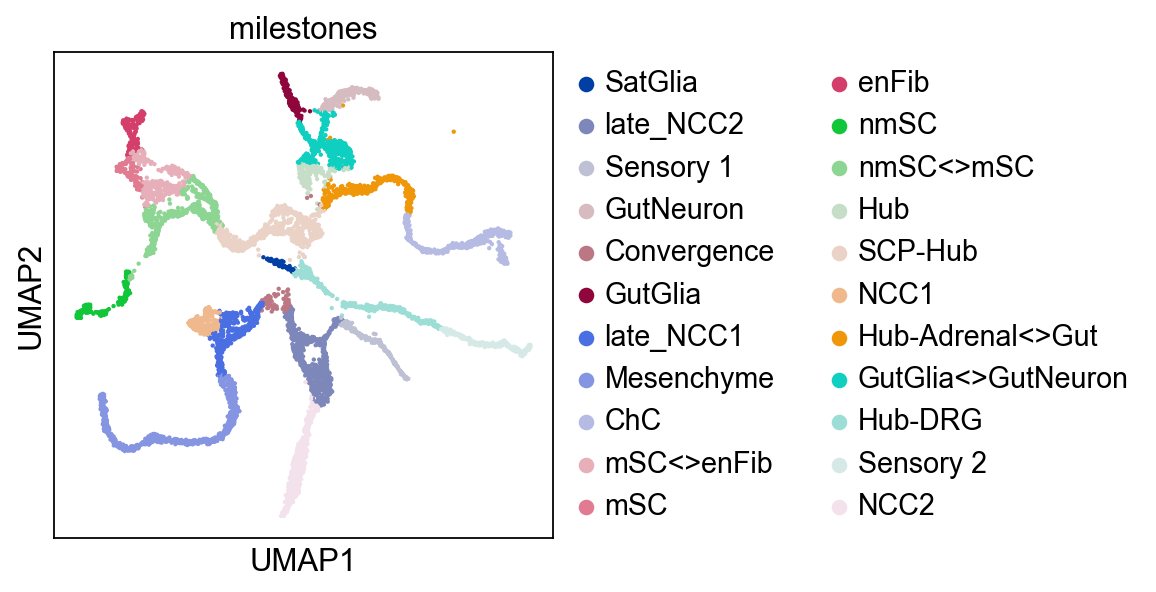

In [4]:
sc.pl.umap(adata_all,color="milestones")

In [5]:
#import matplotlib.pyplot as plt
#scf.pl.milestones(adata_all,roots=["NCC2","NCC1","Mesenchyme"],layout="reingold_tilford")

In [6]:
adata=sc.read("data/adata_bif_SASC.h5ad")
r="NCC2"
m=["SA","imSC"]

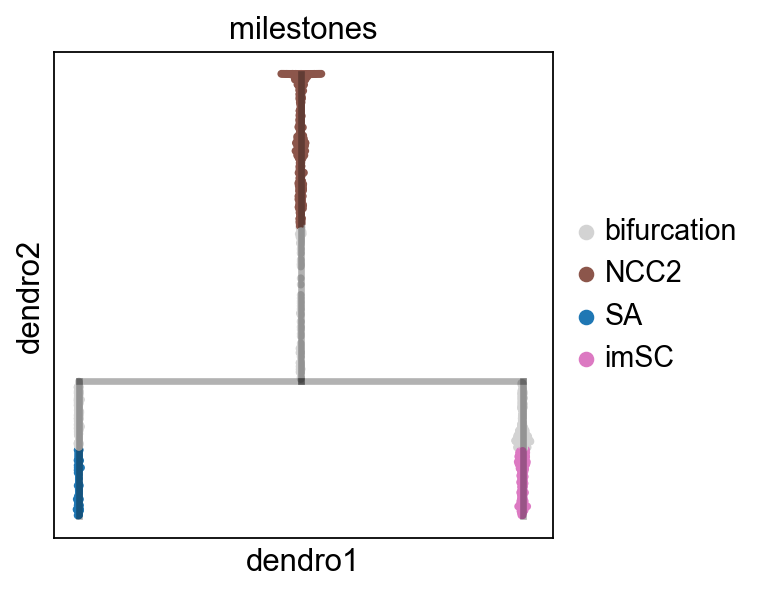

In [7]:
scf.pl.dendrogram(adata,color="milestones",palette=["lightgrey","tab:brown","tab:blue","#DC79C2"])

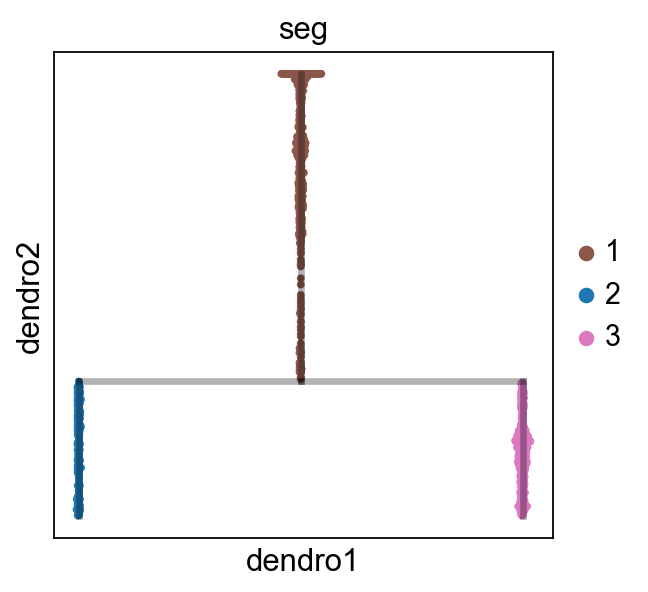

In [8]:
scf.pl.dendrogram(adata,color="seg",palette=["tab:brown","tab:blue","#DC79C2"])

/home/lfaure/miniconda3/envs/bio-gpu-18/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sel' as categorical


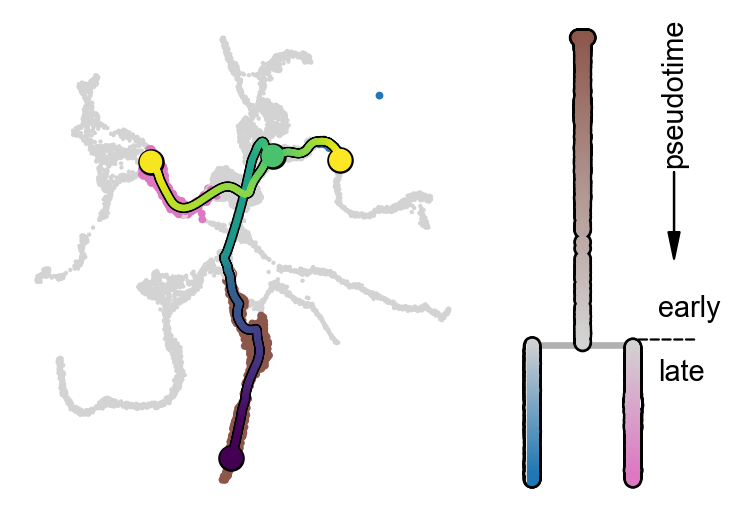

In [9]:
import matplotlib.pyplot as plt
sc.set_figure_params(frameon=False)

fig,axs=plt.subplots(1,2,gridspec_kw=dict(width_ratios=[4,1]),figsize=(5,4))

adata_all.obs["sel"]=adata_all.obs_names.isin(adata.obs_names).astype(str)
sc.pl.umap(adata_all,color="sel",groups="True",show=False,ax=axs[0],
              legend_loc="none",palette=["grey","grey"])
scf.pl.trajectory(adata,color_cells="milestones",legend_loc="none",title="",alpha=1,ax=axs[0],scale_path=.6,show=False)

sc.set_figure_params(figsize=(1,4),frameon=False)

ax=scf.pl.dendrogram(adata,color_milestones=True,s=100,frameon=False,ax=axs[1],
                  add_outline=True,clip_on=False,tree_behind=True,show=False)
axs[1].annotate("pseudotime",(1.3,.5),(1.3,.7),xycoords="axes fraction",rotation=90,horizontalalignment='center',size=13,
            arrowprops=dict(facecolor="black",width=.1,headwidth=5))


axs[1].annotate("",(2,-0.052026),(3.3,-0.052026),xycoords="data",rotation=90,horizontalalignment='center',size=13,
                arrowprops=dict(facecolor="black",arrowstyle="-",linestyle="--"))

axs[1].annotate("early",(2,-0.042026),(2.5,-0.048026),xycoords="data",horizontalalignment='left',size=13)

axs[1].annotate("late",(2,-0.042026),(2.5,-0.059026),xycoords="data",horizontalalignment='left',size=13)
#axs[1].axhline(-0.052026)

plt.savefig("figures/fig6a.pdf",bbox_inches="tight")

In [10]:
adata_s=scf.tl.simplify(adata,n_nodes=4,copy=True)

simplifying graph
node 0 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:00) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> graph simplified


/home/lfaure/miniconda3/envs/bio-gpu-18/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


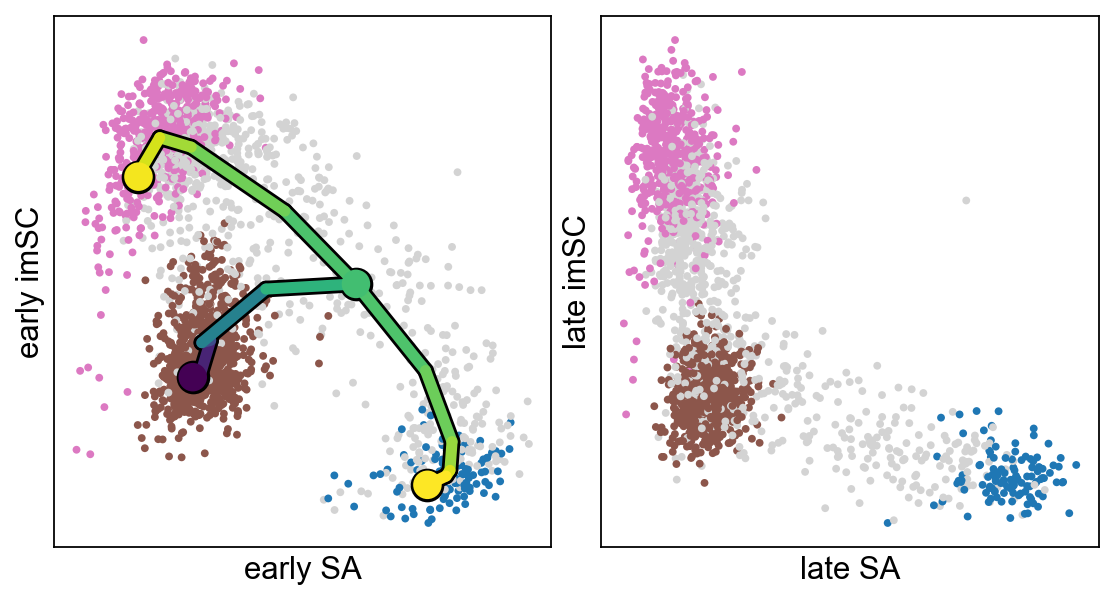

In [11]:
sc.set_figure_params()
axe,axl=scf.pl.modules(adata,r,m,color="milestones",show_traj=False,show=False)
scf.pl.modules(adata_s,r,m,show_traj=True,alpha=0,show=False,ax_early=axe,ax_late=axl)
plt.savefig("figures/modules_fig6b.pdf",dpi=300)

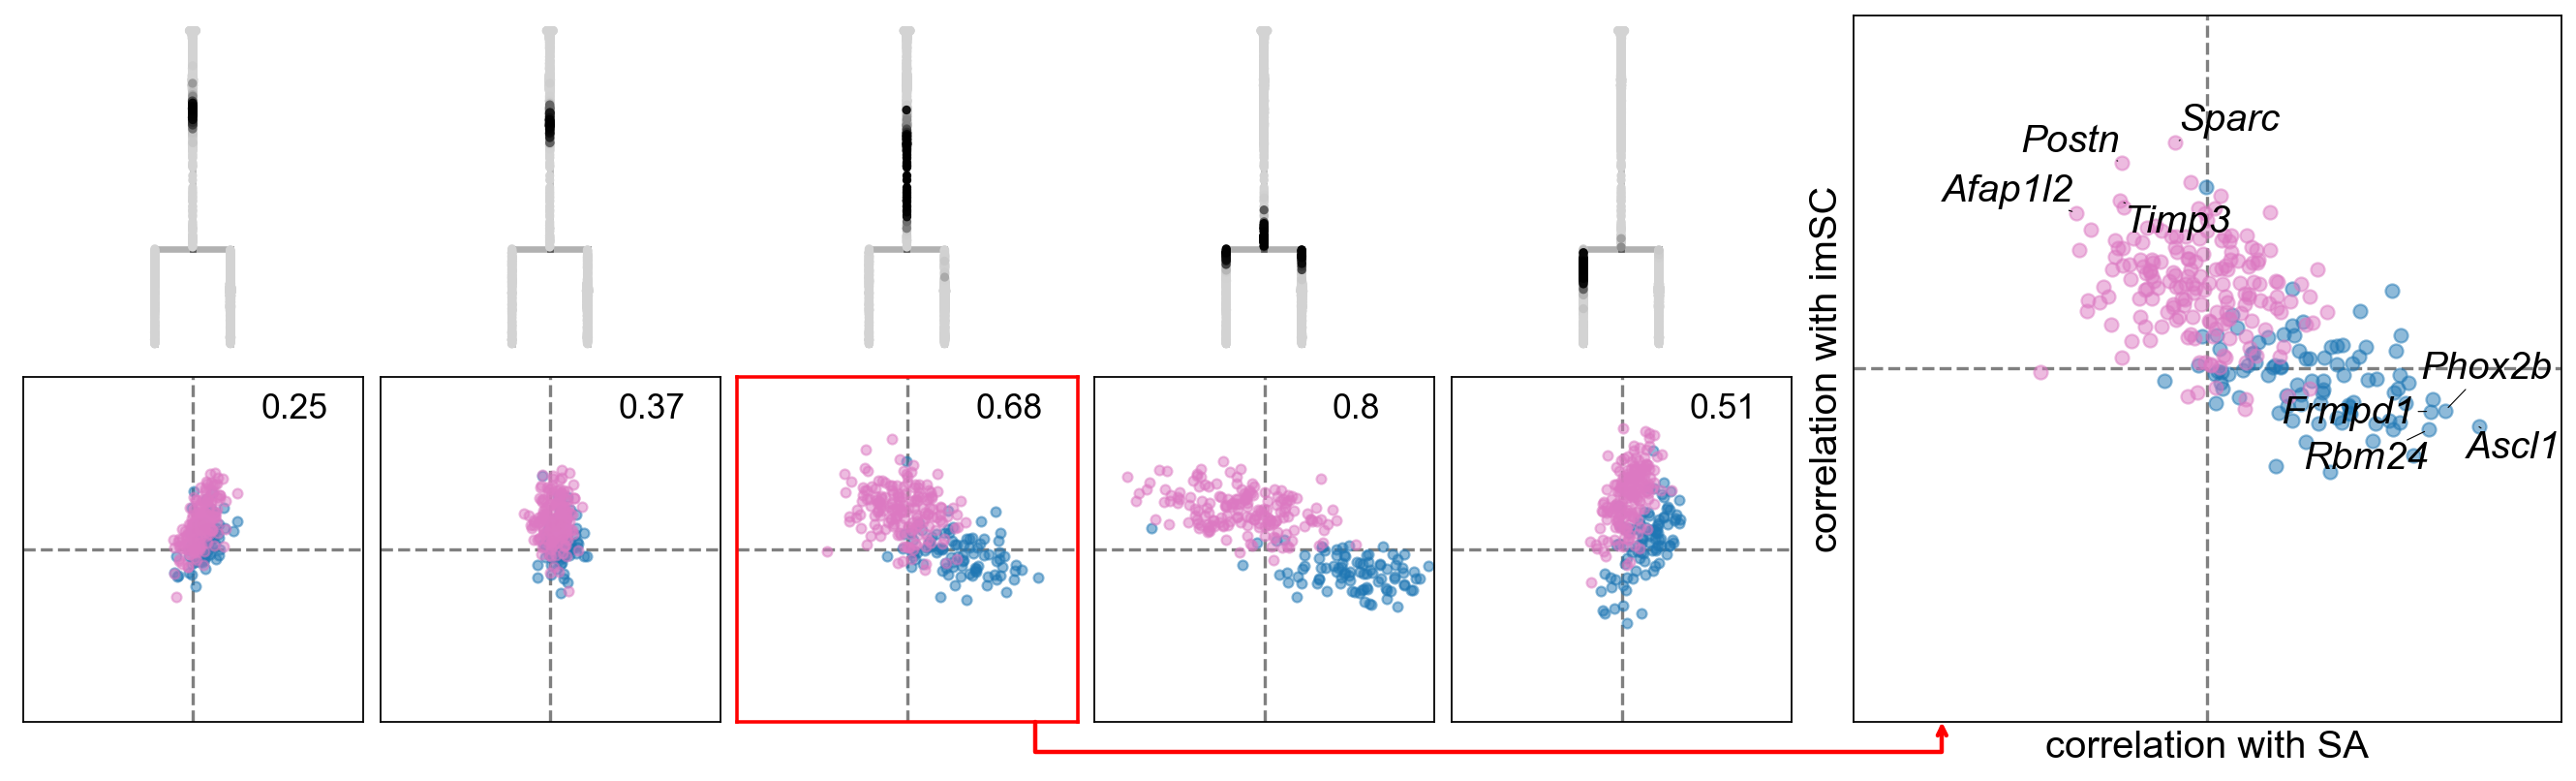

In [12]:
sc.set_figure_params(figsize=(1,4)) 
scf.pl.slide_cors(adata,r,m,basis="dendro",frame_emb=False,tree_behind=True,win_keep=range(8,13),focus=2,
                    kwargs_text=dict(fontsize=18,style="italic"),
                    kwargs_adjust=dict(arrowprops=dict(arrowstyle="-", color='k', lw=0.5)),
                 save="_fig6d.pdf")

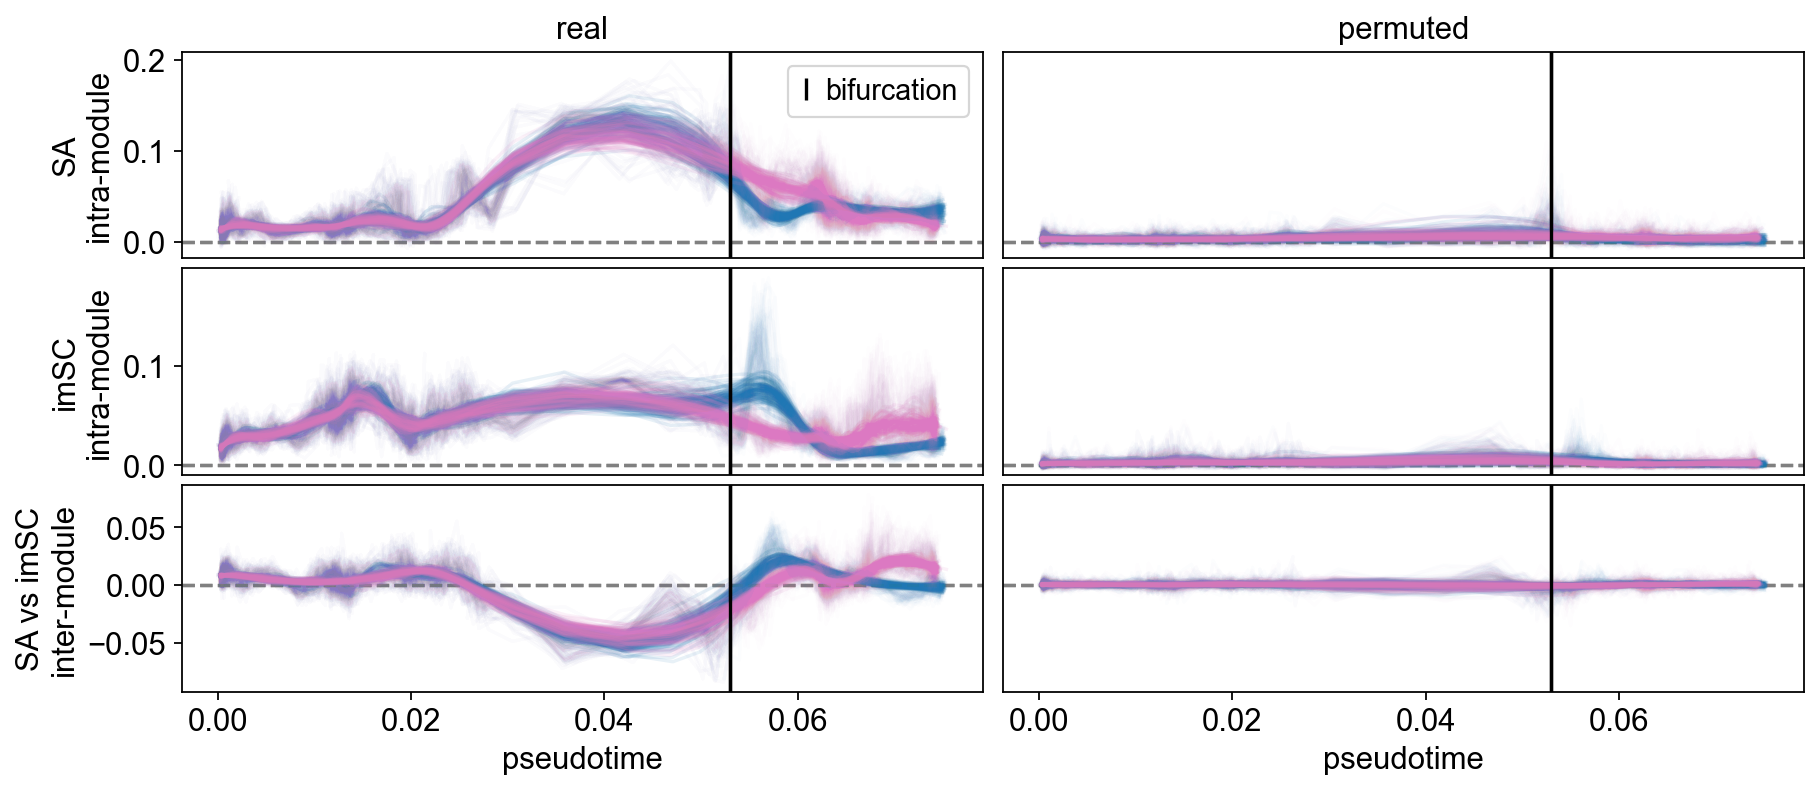

In [39]:
scf.pl.synchro_path(adata,r,m,knots=20,save="_fig6e.pdf",figsize=(13,5))

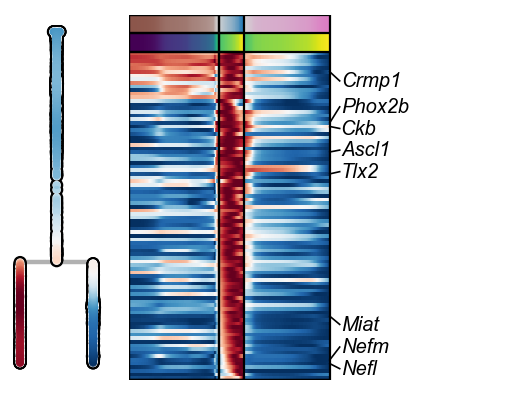

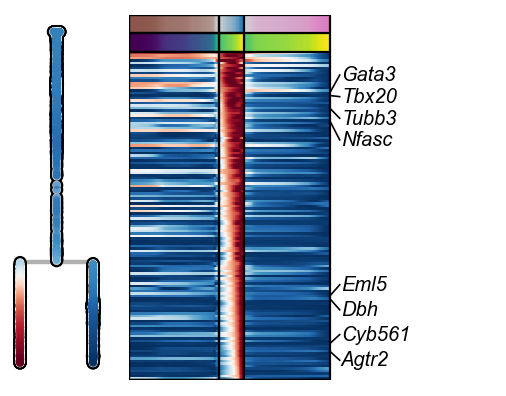

In [14]:
sc.set_figure_params(figsize=(1,4))

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="early",branch=m[0],ordering="max",clip_on=False,wspace=0.1,style="italic",n_features=8,
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones",save="_fig6c-eA.pdf")

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="late",branch=m[0],ordering="max",clip_on=False,wspace=0.1,style="italic",n_features=8,
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones",save="_fig6c-lA.pdf")

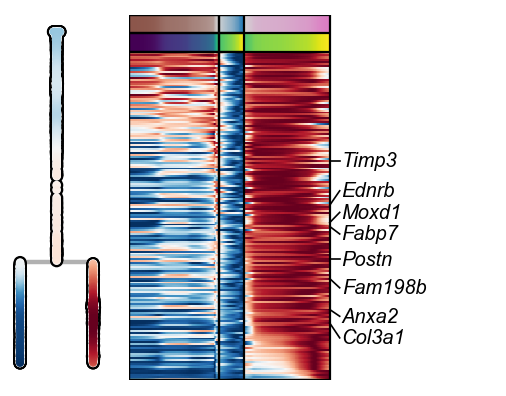

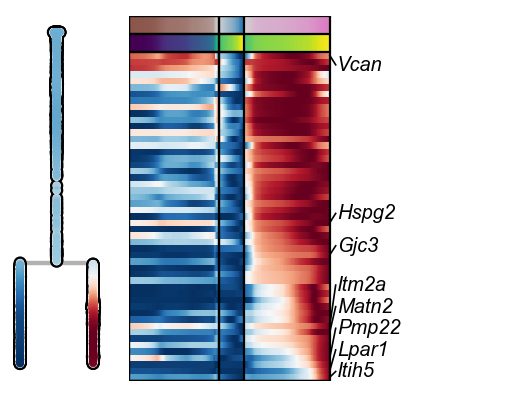

In [15]:
scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="early",branch=m[1],ordering="max",clip_on=False,wspace=0.1,style="italic",n_features=8,
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones",save="_fig6c-eB.pdf")

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="late",branch=m[1],ordering="max",clip_on=False,wspace=0.1,style="italic",n_features=8,
              figsize=(3.8,3),heatmap_space=.2,offset_names=.03,linewidth_seg=2,annot="milestones",save="_fig6c-lB.pdf")

In [16]:
fname="fig6"

In [17]:
import subprocess
import numpy as np
files=["figures/fig6a.pdf","figures/modules_fig6b.pdf"]
file=files[0]

def get_ratio(file):
    command=('identify %s'%file).split()
    arr=np.array(subprocess.check_output(command).decode("utf-8").split(" ")[2].split("x"),dtype=int)
    return arr[0]/arr[1]

ratios=np.array([get_ratio(file) for file in files])
sum_ratios=ratios.sum()

In [18]:
scf.get.fork_stats(adata,r,m).loc[["Ednrb","Timp3","Moxd1","Mcam","Postn","Col5a1","Plp1","Sparc"]]

,SA,imSC,de_p,fdr,signi_p,signi_fdr,up_A,up_p,branch,activation,module
Ednrb,-2.027953,0.0,8.948438e-294,3.710917e-290,1.0,1.0,13.229916,3.545917e-229,imSC,0.046421,early
Timp3,-2.303857,0.0,1.230575e-313,5.103196e-310,1.0,1.0,22.973309,1.860897e-219,imSC,0.003805,early
Moxd1,-2.091441,0.0,7.172769e-188,2.974547e-184,1.0,1.0,30.065924,1.415240e-230,imSC,0.003805,early
Mcam,-2.067248,0.0,9.658390e-319,4.005335e-315,1.0,1.0,21.634687,3.318666e-237,imSC,0.020547,early
Postn,-2.861346,0.0,0.000000e+00,0.000000e+00,1.0,1.0,37.620259,0.000000e+00,imSC,0.003805,early
Col5a1,-1.483640,0.0,2.863362e-246,1.187436e-242,1.0,1.0,17.706726,2.762002e-291,imSC,0.015981,early
Plp1,-1.758882,0.0,9.306839e-289,3.859546e-285,1.0,1.0,7.298315,5.739904e-86,imSC,0.006849,early
Sparc,-1.449354,0.0,0.000000e+00,0.000000e+00,1.0,1.0,27.654692,0.000000e+00,imSC,0.003805,early


In [19]:
scf.get.fork_stats(adata,r,m).loc[["Tbx2","Slit3","Elavl4","Phox2b","Ascl1","Hand2","Insm1"]]

,SA,imSC,de_p,fdr,signi_p,signi_fdr,up_A,up_p,branch,activation,module
Tbx2,0.0,-1.471179,2.386873e-126,9.898362e-123,1.0,1.0,35.140560,1.952547e-320,SA,0.044912,early
Slit3,0.0,-1.347705,5.786089e-108,2.399491e-104,1.0,1.0,22.552846,3.440150e-114,SA,0.009896,early
Elavl4,0.0,-1.946292,5.486760e-219,2.275359e-215,1.0,1.0,25.037455,6.155316e-128,SA,0.003806,early
Phox2b,0.0,-1.732165,3.759157e-136,1.558922e-132,1.0,1.0,40.989185,0.000000e+00,SA,0.025120,early
Ascl1,0.0,-2.253291,2.393232e-303,9.924733e-300,1.0,1.0,43.540479,0.000000e+00,SA,0.026643,early
Hand2,0.0,-1.584588,3.064924e-230,1.271024e-226,1.0,1.0,32.590418,0.000000e+00,SA,0.057091,late
Insm1,0.0,-2.084391,0.000000e+00,0.000000e+00,1.0,1.0,35.255564,0.000000e+00,SA,0.047957,late


In [20]:
ratios

array([1.4248927 , 1.85239852])

In [21]:
a,b=(ratios/sum_ratios)-0.01

In [41]:
-7-3*4

-19

In [26]:
230-7-3*4

211

In [44]:
%%bash -s $fname $a $b
cat<<EOF >$1.tex
\documentclass[11pt]{article}
\usepackage[paperheight=211mm,paperwidth=180mm]{geometry}
 \geometry{
 left=5mm,
 right=5mm,
 top=5mm,
 bottom=5mm,
 }

\usepackage[labelfont=bf]{caption}
\usepackage{multirow}
\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 
\usepackage{svg}
\begin{document}
\setmainfont{Arial}

\definecolor{Blue}{RGB}{50, 49, 145}

\noindent
\scriptsize 

\begin{minipage}[t]{$2\textwidth}
\raggedright \textbf{A} \textcolor{Blue}{Selection on trajectory}
\includegraphics[width=1\textwidth]{figures/fig6a.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{$3\textwidth}
\raggedright \textbf{B} \textcolor{Blue}{Early and late genes modules}
\includegraphics[width=1\textwidth]{figures/modules_fig6b.pdf}
\end{minipage}\hfill

\raggedright \textbf{C} \textcolor{Blue}{Early and late genes modules heatmaps}

\begin{minipage}[t]{.24\textwidth}
\center early SA
\includegraphics[trim=0 0 1.3cm 0,width=1\textwidth]{figures/trends_fig6c-eA.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.24\textwidth}
\center late SA
\includegraphics[trim=0 0 1.3cm 0,width=1\textwidth]{figures/trends_fig6c-lA.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.24\textwidth}
\center early imSC
\includegraphics[trim=0 0 1.3cm 0,width=1\textwidth]{figures/trends_fig6c-eB.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.24\textwidth}
\center late imSC
\includegraphics[trim=0 0 1.3cm 0,width=1\textwidth]{figures/trends_fig6c-lB.pdf}
\end{minipage}\hfill


\begin{minipage}[t]{\textwidth}
\raggedright \textbf{D} \textcolor{Blue}{Sliding window correlation of early genes}
\includegraphics[width=1\textwidth]{figures/slide_cors_fig6d.pdf}
\end{minipage}\hfill


\begin{minipage}[t]{.55\textwidth}
\vspace{0cm}
\raggedright \textbf{E} \textcolor{Blue}{Intra and inter-module correlation over the trajectory}
\includegraphics[width=1\textwidth]{figures/synchro_path_fig6e.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.4\textwidth}
\vspace{.5cm}

\end{minipage}\hfill




\hfill
\clearpage


EOF

echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.tex
convert -flatten -density 300 $1.pdf $1.jpg
identify $1.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./fig5.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/multirow/multirow.sty)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/t

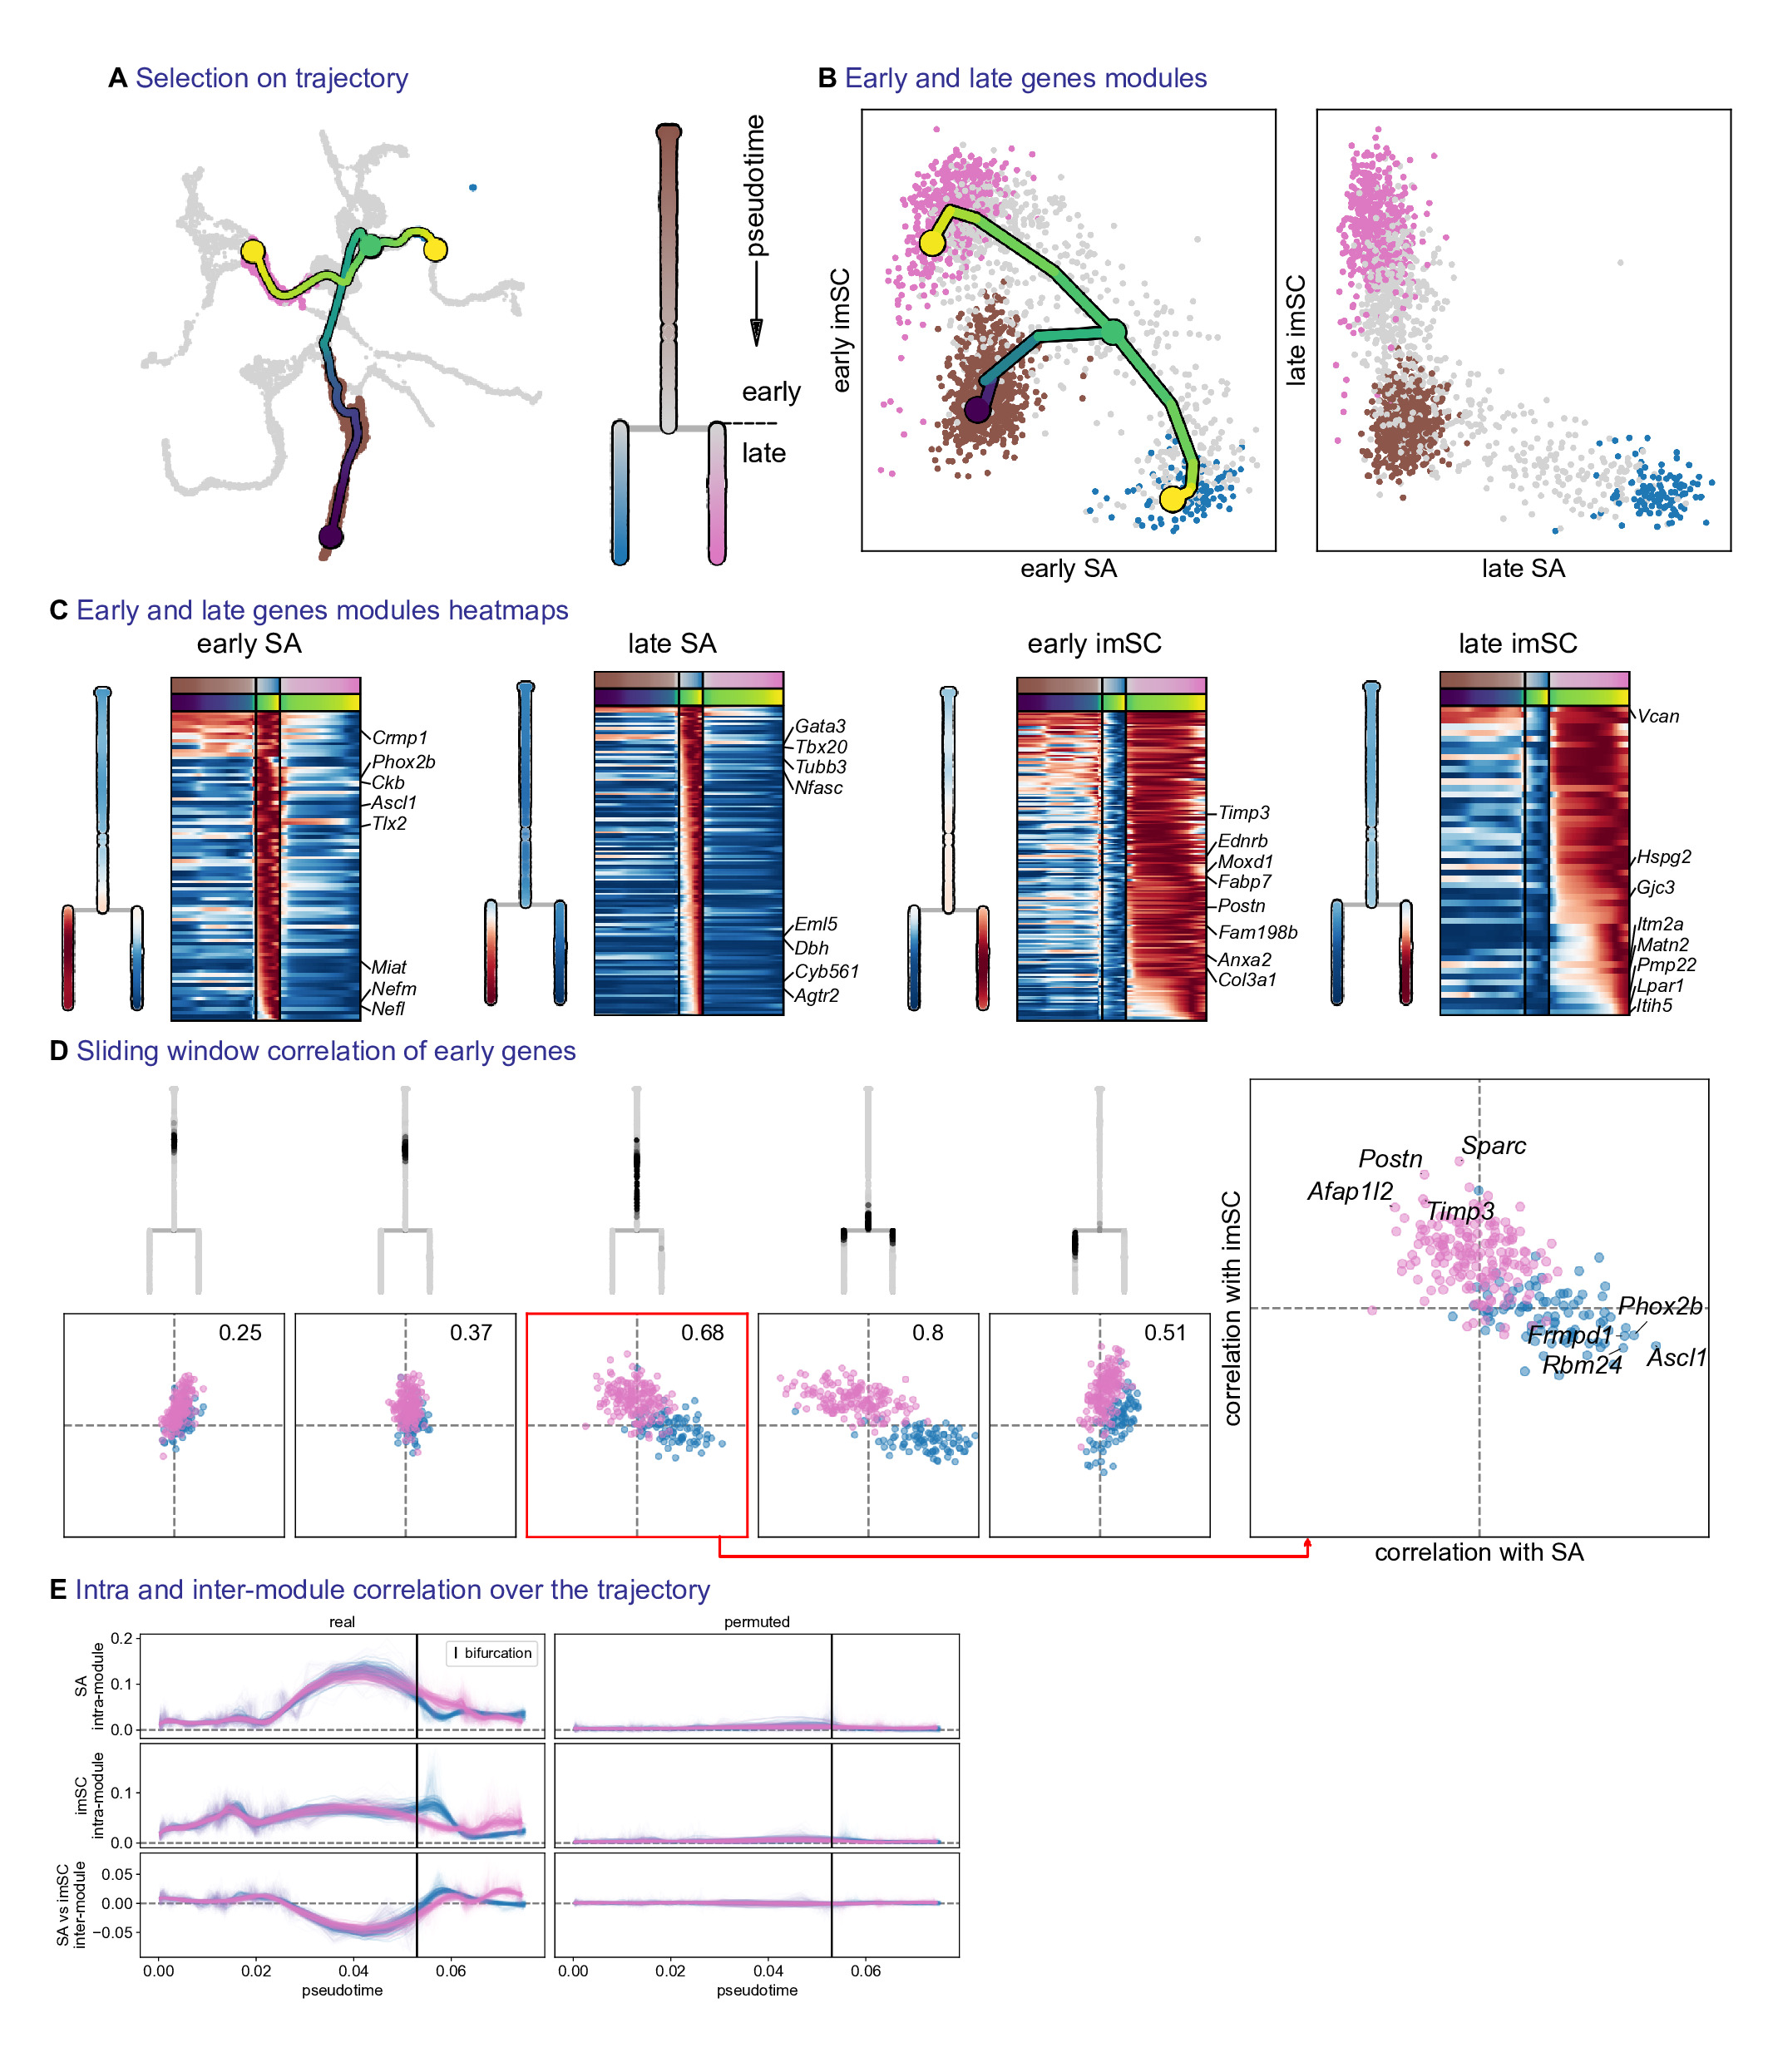

In [45]:
from IPython.display import Image
Image(filename=fname+'.jpg') 

## ADD Ets1 and Six1 UMAPs